# Alternus Vera | Sprint 3 by Rupal Martin
    
Name: **Rupal Martin (012169300)** 

#### Process Steps: 
- Importing libraries and reading the Data 
- ** Data Cleaning and Text Preprocessing **
    - Cleaning Text 
    - Tokenize the text
    - Remove Stop Words
    - Stemming 
    - Spell check 
    - Puntuation remove 
  
- **Visualization **
- ** Data Enrichment ** using SenticNet 5
- **Bag of Words** using CountVectorizer
- Modeling and comparison 
- Sentiment Analysis using **TF-IDF**
- Modeling and comparison
- **Sentiment Analysis** using Word2Vec (skip-gram) **For good accuracy doing Doc2Vec**
- Sentiment Analysis using Doc2Vec 
- **LDA**, Topic modelling
- Algorithms & comparison
    -Classifier Modeling using Doc2Vec
    - Building Classifier using **Logistic regression**
    - Building Classifier using **Linear SVM Classifier**
    - Building Classifier using **RandomForestClassifier**
    - Building Classifier using **SVM Stochastic Gradient Descent**
- Final result 


#### Feature Implemented
- **State Info**
- **Sentiments**
- **Speaker**


### Import libraries and loading library

In [1]:
import pandas as pd
import numpy as np

In [2]:
test_filename = 'Dataset/test.tsv'
train_filename = 'Dataset/train.tsv'
#valid_filename = 'valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
#valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames,error_bad_lines=False)

In [3]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [4]:
# Let's check the first news in the training dataset
train_news.iloc[0]["headline_text"][:len(train_news.iloc[0]["headline_text"])]

'Says the Annies List political group supports third-trimester abortions on demand.'

### Data Cleaning and Preprocessing 
- Cleaning Text 
- Tokenize the text
- Remove Stop Words
- Stemming 
- Spell check 
- Puntuation remove 


#### Removing Non-Letter Characters & Converting Reviews to Lower Case 

In [5]:
import re

example = train_news["headline_text"][0]
news = re.sub("[^a-zA-Z]", " ", example)
print("Before: ", example)
news = news.lower()
print("After: ", news)

Before:  Says the Annies List political group supports third-trimester abortions on demand.
After:  says the annies list political group supports third trimester abortions on demand 


#### Tokenization 
> Splitting a sentence or paragraph into words.

In [6]:
# Import Natural Language Toolkit
import nltk

# Instead of using just split() method, used word_tokenize in nltk library.
print("Before: ", news)
news_words = nltk.word_tokenize(news)
print("After: ", news_words)

Before:  says the annies list political group supports third trimester abortions on demand 
After:  ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


#### Removing Stop words 

In [7]:
from nltk.corpus import stopwords

print("List of Stop words: \n" , stopwords.words("english"))
# Exclude the stop words from the original tokens.
words = [w for w in news_words if not w in set(stopwords.words("english"))]
print("\n\nBefore: \n", news_words)
print("\nAfter: \n", words)

List of Stop words: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

#### Observations: 
    
> As you can see the words "the" and "on" is removed


**Stemming algorithms:** 
- Using Snowball

In [8]:
snow = nltk.stem.SnowballStemmer('english')

stems = [snow.stem(w) for w in words ]
print("Before: \n", words )
print("\nAfter: \n",stems )

Before: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']

After: 
 ['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand']


### All Together in one function


In [9]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters.
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 7. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [10]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.1048571507136027 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.012978037198384603 min


### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. 

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

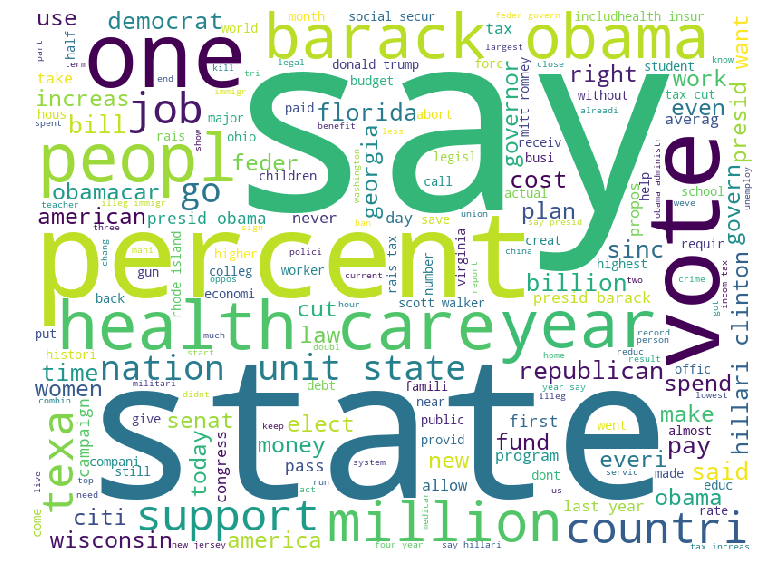

In [12]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

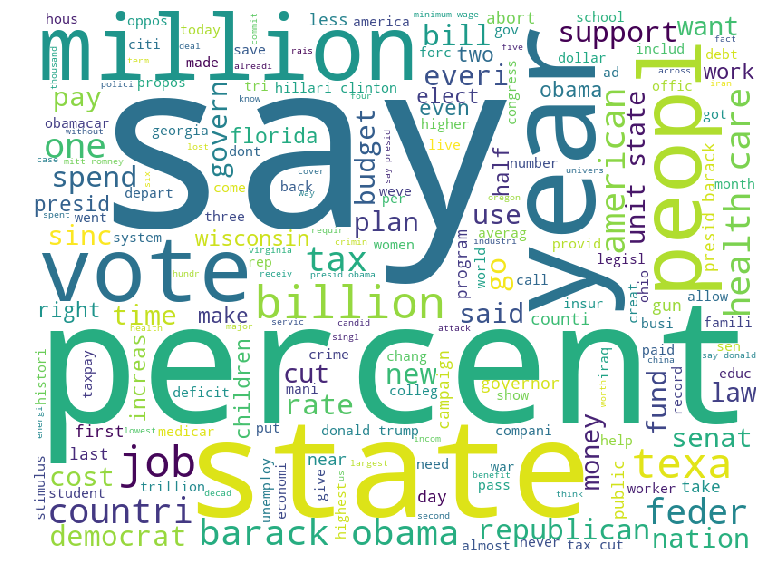

In [13]:
cloud(' '.join(test_news['clean']))

#### Observation from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus

# Data Enrichment

#### SenticNet:  

In [14]:
from sklearn.preprocessing import scale

sentic_net = pd.read_csv('Dataset/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [15]:
senti = (nltk.word_tokenize(train_news['clean'][0]))
print("\n Polarity of word - list : ", (sentic_net.loc[sentic_net.Token == senti[2]]).Polarity.any())
print("\n Intensity of word - list : ", float( (sentic_net.loc[sentic_net.Token == senti[2]]).Intensity ))


 Polarity of word - list :  positive

 Intensity of word - list :  0.11599999999999999


> A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.

In [16]:
senti_word_vector = []
def create_sentiment_vector_of_sentence(sentence):
    sentence_sentiment_vector=np.array([])    
    pol_score=[]
    intensity = []
    
    for word in sentence:        
        token_lower = word.lower()
        lemma_token = nltk.WordNetLemmatizer().lemmatize(token_lower)        
        if token_lower is 'not':
            pol_score =  np.append(pol_score, -1)
            intensity =  np.append(intensity, -1)
            
        elif lemma_token in sentic_net.Token.values:
            sentic_net_object = sentic_net.loc[sentic_net.Token == lemma_token]
            polarity = -1 if sentic_net_object.Polarity.any()  == 'negative' else 1
            pol_score = np.append(pol_score, polarity)
            intensity = np.append(intensity, float(sentic_net_object.Intensity))

        else:
            pol_score =  np.append(pol_score, 0)
            intensity =  np.append(intensity, 0)
    pol_score = float(sum(pol_score))/len(pol_score)
    senti_word_vector.append(intensity)
    intensity = float(sum(intensity))/len(intensity)
    
    sentence_sentiment_vector = np.append(sentence_sentiment_vector,[pol_score, intensity])
    return sentence_sentiment_vector

In [17]:
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
for index, row in train_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

print("score: ", sentiment_score) # values will be between -1 and 1
print("polarity: ", sentiment_polarity) # 1 for positive and 0 for negative 

print(senti_word_vector)
# Add as a column to the dataset 
train_news['senti_score'] = sentiment_score
train_news['senti_polarity'] = sentiment_polarity

score:  [0.08959999999999999, -0.010785714285714287, 0.01575000000000001, 0.2501, 0.0252, -0.023666666666666666, 0.16866666666666666, 0.022466666666666656, 0.119, 0.12625, 0.25825, 0.165, 0.02800000000000001, 0.4383333333333333, 0.201375, 0.2508235294117647, 0.02278571428571429, 0.3511538461538462, 0.10391666666666667, -0.0004285714285714131, 0.1358181818181818, 0.317625, -0.05449999999999997, 0.37333333333333335, 0.361, 0.025750000000000002, -0.09066666666666667, 0.11646153846153846, 0.008571428571428572, 0.1648, 0.064, 0.12990000000000004, -0.055500000000000015, 0.1976, 0.47500000000000003, 0.26257142857142857, -0.059555555555555556, 0.24771428571428566, 0.16366666666666665, -0.2416923076923077, 0.08030769230769229, -0.15125, -0.0669090909090909, 0.07194444444444444, -0.061615384615384614, 0.3764444444444444, 0.0, -0.07200000000000001, 0.2136153846153846, 0.10444444444444444, 0.26815384615384613, 0.12642857142857142, 0.2292222222222222, 0.21505882352941177, 0.1136666666666667, 0.3926

[array([ 0.614,  0.   ,  0.116,  0.   ,  0.093,  0.12 ,  0.067,  0.   ,
       -0.87 ,  0.756]), array([ 0.   , -0.78 ,  0.08 ,  0.08 ,  0.   ,  0.943,  0.   ,  0.08 ,
        0.136,  0.   ,  0.   ,  0.   , -0.69 ,  0.   ]), array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.101,  0.805,  0.   ,
       -0.69 ,  0.153, -0.18 ,  0.   ]), array([ 0.857,  0.784, -0.89 ,  0.   ,  0.   ,  0.   ,  0.782,  0.968,
        0.   ,  0.   ]), array([0.   , 0.   , 0.08 , 0.046, 0.   ]), array([ 0.   ,  0.773,  0.08 ,  0.04 ,  0.067, -0.74 ,  0.148, -0.73 ,
        0.   ,  0.   ,  0.   , -0.03 ,  0.067, -0.03 ,  0.   ]), array([ 0.   ,  0.   ,  0.929,  0.823,  0.   , -0.74 ]), array([ 0.903,  0.801, -0.66 ,  0.   ,  0.067, -0.74 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.856, -0.89 ,  0.   ,  0.   ]), array([ 0.   ,  0.   ,  0.182,  0.   ,  0.   ,  0.943, -0.03 ,  0.   ,
        0.   ,  0.624,  0.081,  0.   ,  0.   ,  0.   ,  0.104,  0.   ]), array([0.614, 0.   , 0.   , 0.   , 0.   , 0.   , 0

In [18]:
train_news['senti_word_vector'] =senti_word_vector

In [19]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0.089600,1,"[0.614, 0.0, 0.11599999999999999, 0.0, 0.09300..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,-0.010786,1,"[0.0, -0.78, 0.08, 0.08, 0.0, 0.943, 0.0, 0.08..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,0.015750,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.10099999999999999,..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,0.250100,1,"[0.857, 0.784, -0.89, 0.0, 0.0, 0.0, 0.782, 0...."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,0.025200,1,"[0.0, 0.0, 0.08, 0.046, 0.0]"


In [20]:
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
senti_word_vector = []

for index, row in test_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

# Add as a column to the dataset 
test_news['senti_score'] = sentiment_score
test_news['senti_polarity'] = sentiment_polarity
test_news['senti_word_vector'] =senti_word_vector

In [21]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0.038000,1,"[0.8590000000000001, 0.05, 0.0, 0.0, 0.033, 0...."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,-0.227167,0,"[0.0, 0.107, 0.0, -0.73, 0.0, -0.74]"
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,0.199571,1,"[0.614, 0.0, 0.0, 0.0, 0.0, 0.823, -0.04]"
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,0.023778,1,"[0.0, 0.0, 0.12, 0.083, -0.05, 0.0, 0.0, 0.0, ..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether hes center crimin scheme vi...,0.118800,1,"[0.845, -0.83, 0.0, 0.0, 0.10400000000000001, ..."


### Bag of Words 

> Bag of Words is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. 


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [23]:
# As mentioned many times, the matrix is going to be huge 
# so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [24]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.
train_bw = pipe.fit_transform(train_news['clean'])

# We only call transform not fit_transform due to the risk of overfitting.
test_bw = pipe.transform(test_news['clean'])
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (10240, 7626) test dim: (1267, 7626)


In [25]:
# Get the name fo the features
countV_features = vectorizer.get_feature_names()
print(countV_features[:25])

['aa', 'aaa', 'aaron', 'aarp', 'aba', 'abandon', 'abba', 'abbott', 'abc', 'abdul', 'abedin', 'abel', 'abid', 'abil', 'abillion', 'abject', 'abl', 'aboard', 'abolish', 'abolit', 'abort', 'abortioneven', 'abortionist', 'abraham', 'abrahamlincoln']


In [26]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = countV_features)
train_sum.head()

,aa,aaa,aaron,aarp,aba,abandon,abba,abbott,abc,abdul,...,zero,zika,zimmerman,zinn,zip,zippo,zombi,zone,zoo,zuckerberg
0,1,3,2,4,1,3,2,16,4,1,...,45,9,1,1,3,1,2,10,1,2


### Classifier Modeling using CountVectorizer 

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

##### Classifier using Naives Bayes regression

In [28]:
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())])

nb_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['senti_polarity'])

0.8768745067087609

#### Classifier using Logistic regression

In [29]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',LogisticRegression())
        ])
logR_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['senti_polarity'])

0.9242304656669298

##### Classifier using Linear SVM Classifier

In [30]:
svm_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['senti_polarity'])

0.9392265193370166

#####  Classifier using SVM Stochastic Gradient Descent on hinge loss

In [31]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['senti_polarity'])

0.8981846882399369

##### Classifier using RandomForestClassifier

In [32]:
#random forest
random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['clean'],train_news['senti_polarity'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['senti_polarity'])

0.8587213891081295

### Models performance Comparison 

In [33]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['senti_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['senti_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [34]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Classifier Name:  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Total statements classified: 10240
Accuracy: 0.9216383913922968
Confusion matrix:
[[ 461 1214]
 [ 207 8358]]



Classifier Name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Total statements classified: 10240
Accuracy: 0.9482000190175208
Confusion matrix:
[[ 989  686]
 [ 225 8340]]



Classifier Name:  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Total statements classified: 10240
Accuracy: 0.9495276690875969
Confusion matrix:
[[1209  466]
 [ 402 8163]]



Classifier Name:  SGDClassifier(alpha=0.001, average=False, class_weight

(None, None, None, None, None, None)

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with CounterVectorizer seems to be 95% accurate. 

#### NLTK Sentiment Intensity Analyzer using VADER **(Valence Aware Dictionary and sEntiment Reasoner)**

In [35]:
import nltk.sentiment
warnings.filterwarnings("ignore",category=UserWarning)
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [36]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [37]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [38]:
sentiment = []
vader_pol = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.562, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.144, 0.778, 0.078, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.322, 0.678, 0.0, -0.508]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.116, 0.884, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0,

[0, 0.113, 0.887, 0.0, -0.3182]
[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.073, 0.622, 0.306, 0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.545, 0.455, 0.0, -0.5574]
[0, 0.0, 0.894, 0.106, 0.0772]
[0, 0.118, 0.73, 0.152, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.647, 0.353, 0.6124]
[0, 0.0, 0.699, 0.301, 0.5574]
[0, 0.135, 0.675, 0.19, 0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.649, 0.351, 0.0, -0.7506]
[0, 0.197, 0.803, 0.0, -0.4019]
[0, 0.0, 0.863, 0.137, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.095, 0.743, 0.162, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.228, 0.423, 0.349, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 0.748, 0.252, 0.4019]
[1, 0.0, 0.484, 0.516, 0.7506]
[0, 0.149, 0.851, 0.0, -0.1027]
[0, 0.0, 0.67, 0.33, 0.8126]
[0, 0.425, 0.575, 0.0, -0.8126]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.32, 0.574, 0.107, -0.7351]
[0, 0.385, 0.615, 0.0, -0.6124]
[0, 0.0,

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.178, 0.593, 0.229, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.163, 0.667, 0.17, 0.0516]
[0, 0.394, 0.606, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.755, 0.245, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.891, 0.109, 0.0258]
[0, 0.0, 0.758, 0.242, 0.4939]
[0, 0.302, 0.698, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.281, 0.719, 0.0, -0.5994]
[0, 0.0, 0.729, 0.271, 0.3818]
[0, 0.0, 0.878, 0.122, 0.2023]
[0, 0.237, 0.763, 0.0, -0.4767]
[0, 0.0, 0.816, 0.184, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.423, 0.577, 0.0, -0.296]
[0, 0.225, 0.775, 0.0, -0.4404]
[0, 0.0, 0.702, 0.298, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.365, 0.635, 0.0, -0.3182]
[0, 0.0, 0.814, 0.186, 0.4939]
[0, 0.077, 0.861, 0.062, -0.0772]
[0, 0.32, 0.68, 0.0, -0.6908]
[0, 0.273, 0.625, 0.102, -0.4939]
[0, 0.

[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.136, 0.593, 0.271, 0.3818]
[0, 0.082, 0.819, 0.1, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.28, 0.72, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0.16, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.125, 0.714, 0.161, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.4397]
[0, 0.304, 0.696, 0.0, -0.3612]
[0, 0.298, 0.497, 0.205, -0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 0.658, 0.342, 0.3818]
[1, 0.0, 0.452, 0.548, 0.8658]
[0, 0.237, 0.763, 0.0, -0.4767]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.302, 0.698, 0.0, -0.5994]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.237, 0.763, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0,

[0, 0.13, 0.87, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.292, 0.435, 0.273, -0.3182]
[0, 0.0, 0.683, 0.317, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.457, 0.426, 0.117, -0.6369]
[0, 0.0, 0.759, 0.241, 0.2263]
[0, 0.0, 0.656, 0.344, 0.2732]
[0, 0.455, 0.545, 0.0, -0.3612]
[0, 0.0, 0.808, 0.192, 0.2263]
[0, 0.412, 0.588, 0.0, -0.7096]
[0, 0.0, 0.506, 0.494, 0.8316]
[0, 0.187, 0.813, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.702, 0.132, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.482, 0.518, 0.0, -0.8519]
[0, 0.0, 0.894, 0.106, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.298, 0.702, 0.0, -0.7783]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.787, 0.213, 0.4019]
[0, 0.482, 0.518, 0.0, -0.9313]
[-1, 0.52, 0.48, 0.0,

[0, 0.123, 0.614, 0.263, 0.3818]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.648, 0.352, 0.6644]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.304, 0.696, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.515, 0.485, 0.0, -0.6486]
[0, 0.0, 0.845, 0.155, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.615, 0.385, 0.0, -0.5859]
[0, 0.109, 0.891, 0.0, -0.0572]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.219, 0.781, 0.0, -0.4215]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.324, 0.676, 0.0, -0.34]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.119, 0.881, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0

[0, 0.0, 0.508, 0.492, 0.7003]
[1, 0.108, 0.417, 0.475, 0.6597]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 0.808, 0.192, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.565, 0.435, 0.0, -0.8316]
[0, 0.265, 0.735, 0.0, -0.5574]
[0, 0.115, 0.628, 0.257, 0.4019]
[0, 0.189, 0.811, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.442, 0.455, 0.103, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.262, 0.738, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.845, 0.155, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.101, 0.642, 0.257, 0.7269]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.116, 0.732, 0.152, 0.1531]
[0, 0.392, 0.608, 0.0, -0.7964]
[0, 0.485, 0.515, 0.0, -0.886]
[0, 0.127, 0.636, 0.236, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.196, 0.467, 0.336, 0.3612]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.443, 0.557, 0.0, -0.7306]
[0, 0.0, 1.0, 0.0, 0.0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.29, 0.534, 0.176, -0.3612]
[0, 0.427, 0.455, 0.118, -0.6597]
[0, 0.282, 0.718, 0.0, -0.5733]
[0, 0.0, 0.604, 0.396, 0.7096]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.209, 0.443, 0.348, 0.296]
[1, 0.344, 0.215, 0.441, 0.2263]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.343, 0.657, 0.0, -0.6908]
[0, 0.236, 0.764, 0.0, -0.5719]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.1027]
[0, 0.0, 0.556, 0.444, 0.7506]
[0, 0.0, 0.693, 0.307, 0.2732]
[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.204, 0.796, 0.0, -0.6249]
[0, 0.0, 0.61, 0.39, 0.4939]
[0, 0.0, 0.874, 0.126, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0

[0, 0.165, 0.696, 0.139, -0.1531]
[0, 0.143, 0.649, 0.208, 0.25]
[0, 0.224, 0.705, 0.071, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.304, 0.696, 0.0, -0.5859]
[0, 0.247, 0.753, 0.0, -0.5574]
[0, 0.0, 0.734, 0.266, 0.4404]
[0, 0.0, 0.68, 0.32, 0.5719]
[0, 0.135, 0.865, 0.0, -0.1027]
[0, 0.106, 0.688, 0.206, 0.0516]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.177, 0.823, 0.0, -0.6249]
[0, 0.211, 0.789, 0.0, -0.34]
[0, 0.101, 0.719, 0.18, 0.2732]
[0, 0.179, 0.821, 0.0, -0.34]
[0, 0.0, 0.649, 0.351, 0.4019]
[0, 0.0, 0.615, 0.385, 0.7506]
[0, 0.268, 0.67, 0.062, -0.5106]
[0, 0.095, 0.905, 0.0, -0.25]
[-1, 0.7, 0.3, 0.0, -0.7906]
[0, 0.0, 0.73, 0.27, 0.5719]
[0, 0.133, 0.825, 0.041, -0.4404]
[0, 0.219, 0.781, 0.0, -0.7906]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.152, 0.652, 0.196, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.667, 0.0, -0.5423]
[1, 0.0, 0.337, 0.663, 0.7096]
[0, 0.0, 0.685, 0.315, 0.3182]
[0, 0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5423]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.379, 0.621, 0.0, -0.7269]
[0, 0.0, 0.746, 0.254, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.096, 0.685, 0.219, 0.4215]
[-1, 0.487, 0.375, 0.138, -0.5859]
[0, 0.293, 0.707, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.88, 0.12, 0.128]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.574, 0.426, 0.0, -0.4019]
[0, 0.0, 0.787, 0.213, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.891, 0.109, 0.2411]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.632, 0.368, 0.7506]
[0, 0.0, 0.667, 0.333, 0.3612]
[0, 0.485, 0.515, 0.0, -0.6908]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.0, 0.783, 0.217, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.254, 0.746, 0.0, -0.5267]
[0, 0.467, 0.533, 0.0, -0.7906]
[0, 0.298, 0.702, 0.0, -0.5267]
[0, 0.0, 0.609, 0.391, 0.872]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]


[0, 0.0, 0.857, 0.143, 0.4588]
[1, 0.0, 0.496, 0.504, 0.7269]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.406, 0.594, 0.0, -0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.394, 0.606, 0.0, -0.8316]
[0, 0.194, 0.806, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.798, 0.202, 0.4215]
[0, 0.0, 0.85, 0.15, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.678, 0.322, 0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.282, 0.516, 0.203, -0.4574]
[0, 0.0, 0.725, 0.275, 0.2263]
[0, 0.0, 0.526, 0.474, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4019]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 0.729, 0.271, 0.3818]
[0, 0.0, 0.71, 0.29, 0.5994]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.094, 0.512, 0.394, 0.765]
[0, 0.431, 0.569, 0.0, -0.7246]
[0, 0.315, 0.685, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.86, 0.14, 0.0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.854, 0.146, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.106, 0.528, 0.366, 0.7506]
[0, 0.385, 0.615, 0.0, -0.7845]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.131, 0.686, 0.183, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.828, 0.172, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.205, 0.795, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.296]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.139, 0.667, 0.194, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.224, 0.776, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.388, 0.492, 0.12, -0.7096]
[0, 0.0, 0.643, 0.357, 0.6124]
[0, 0.08, 0.739, 0.182, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0

[0, 0.0, 0.879, 0.121, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.348, 0.536, 0.116, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.322, 0.678, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.227, 0.773, 0.0, -0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.677, 0.323, 0.7351]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.266, 0.734, 0.0, -0.6908]
[0, 0.0, 0.769, 0.231, 0.6369]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.2732]
[0, 0.342, 0.658, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811

[0, 0.108, 0.469, 0.423, 0.7717]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.157, 0.429, 0.414, 0.5574]
[0, 0.201, 0.597, 0.201, 0.0]
[0, 0.474, 0.526, 0.0, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.661, 0.339, 0.0, -0.8316]
[-1, 0.577, 0.423, 0.0, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.64, 0.36, 0.5423]
[0, 0.0, 0.797, 0.203, 0.4215]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.0, 0.794, 0.206, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.87, 0.13, 0.128]
[0, 0.0, 0.656, 0.344, 0.836]
[0, 0.0, 0.667, 0.333, 0.5423]
[0, 0.333, 0.667, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.365, 0.635, 0.0, -0.3182]
[0, 0.095, 0.905, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.902, 0.098, 0.0772]
[0, 0.0, 0.556, 0.444,

In [39]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector,sentiment_vector,vader_polarity
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0.089600,1,"[0.614, 0.0, 0.11599999999999999, 0.0, 0.09300...","[0.123, 0.656, 0.221, 0.296]",0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,-0.010786,1,"[0.0, -0.78, 0.08, 0.08, 0.0, 0.943, 0.0, 0.08...","[0.0, 1.0, 0.0, 0.0]",0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,0.015750,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.10099999999999999,...","[0.161, 0.645, 0.194, 0.128]",0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,0.250100,1,"[0.857, 0.784, -0.89, 0.0, 0.0, 0.0, 0.782, 0....","[0.0, 0.438, 0.562, 0.8402]",1
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,0.025200,1,"[0.0, 0.0, 0.08, 0.046, 0.0]","[0.0, 1.0, 0.0, 0.0]",0


In [40]:
sentiment = []
vader_pol = []
for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.178, 0.593, 0.229, 0.1531]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0.16, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.168, 0.611, 0.221, 0.1779]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.13

[-1, 0.521, 0.418, 0.061, -0.9552]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.304, 0.585, 0.111, -0.5106]
[0, 0.0, 0.874, 0.126, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.702, 0.298, 0.34]
[0, 0.0, 0.612, 0.388, 0.4215]
[1, 0.0, 0.473, 0.527, 0.836]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.5106]
[1, 0.0, 0.482, 0.518, 0.8225]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.801, 0.0, -0.357]
[0, 0.0, 0.69, 0.31, 0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.245, 0.644, 0.112, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.133, 0.727, 0.139, 0.0258]
[0, 0.494, 0.506, 0.0, -0.8316]
[0, 0.0, 0.826, 0.174, 0.2732]
[0, 0.179, 0.636, 0.185, 0.0258]
[0, 0.474, 0.526, 0.0, -0.802]
[0, 0.417, 0.583, 0.0, -0.6486]
[0, 0.274, 0.726, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.191, 0.506, 0.303, 0.25]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.429, 0.571, 0.0, -0.3089]
[0, 0.229, 0.62

In [41]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector,sentiment_vector,vader_polarity
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0.038000,1,"[0.8590000000000001, 0.05, 0.0, 0.0, 0.033, 0....","[0.0, 1.0, 0.0, 0.0]",0
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,-0.227167,0,"[0.0, 0.107, 0.0, -0.73, 0.0, -0.74]","[0.0, 0.794, 0.206, 0.0772]",0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,0.199571,1,"[0.614, 0.0, 0.0, 0.0, 0.0, 0.823, -0.04]","[0.0, 0.69, 0.31, 0.4019]",0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,0.023778,1,"[0.0, 0.0, 0.12, 0.083, -0.05, 0.0, 0.0, 0.0, ...","[0.178, 0.593, 0.229, 0.1531]",0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether hes center crimin scheme vi...,0.118800,1,"[0.845, -0.83, 0.0, 0.0, 0.10400000000000001, ...","[0.0, 0.838, 0.162, 0.4019]",0


### TF-IDF & N-gram

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [43]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training dim: (10240, 153677)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1267, 24601)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
tfidfV.vocabulary_

{'build': 2456,
 'wall': 23375,
 'mexico': 12692,
 'border': 2168,
 'take': 21058,
 'liter': 11711,
 'year': 24322,
 'build wall': 2468,
 'wall mexico': 23378,
 'mexico border': 12693,
 'border take': 2181,
 'take liter': 21078,
 'liter year': 11720,
 'build wall mexico': 2469,
 'wall mexico border': 23379,
 'mexico border take': 12695,
 'border take liter': 2182,
 'take liter year': 21079,
 'wisconsin': 23843,
 'pace': 14754,
 'doubl': 5958,
 'number': 13958,
 'layoff': 11298,
 'wisconsin pace': 23883,
 'pace doubl': 14755,
 'doubl number': 5965,
 'number layoff': 13972,
 'layoff year': 11299,
 'wisconsin pace doubl': 23884,
 'pace doubl number': 14756,
 'doubl number layoff': 5966,
 'number layoff year': 13973,
 'say': 18475,
 'john': 10683,
 'mccain': 12424,
 'done': 5899,
 'noth': 13908,
 'help': 9260,
 'vet': 23006,
 'say john': 18673,
 'john mccain': 10696,
 'mccain done': 12431,
 'done noth': 5906,
 'noth help': 13919,
 'help vet': 9296,
 'say john mccain': 18674,
 'john mccain 

In [45]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

['aaa', 'aaa bond', 'aaa bond rate', 'abbott', 'abbott activ', 'abbott activ state', 'abel', 'abel spent', 'abel spent taxpay', 'abercrombi', 'abercrombi made', 'abercrombi made late', 'abil', 'abil stimul', 'abil stimul job', 'abl', 'abl fool', 'abl fool peopl', 'abl keep', 'abl pool', 'abl pool improv', 'abl sharpli', 'abl sharpli curtail', 'aboard', 'aboard florida']


# Factor: State Info

###  Doc2vec and Classification Algorithm

In [46]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
import pandas as pd
data1 = pd.read_csv('train.csv', error_bad_lines=False, sep=",", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Barely True Counts','False Counts',' Half True Counts','Mostly True Counts','Pants On Fire Counts','The Context'])

FileNotFoundError: File b'train.csv' does not exist

In [ ]:
data1 = data1[['Statement','State Info']]
data1 = data1[pd.notnull(data1['Statement'])]
data1 = data1[pd.notnull(data1['State Info'])]
data1.head(10)

In [ ]:
data1.isnull().sum()

In [ ]:
count_affiliation = data1['State Info'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_affiliation.index, count_affiliation.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('State Info', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [ ]:
data1['Statement'] = data1['Statement'].apply(cleanText)

In [ ]:
data1['Statement'][1]
data1.index = range(8032)

In [ ]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
data1.rename(columns = {'State Info':'StateInfo'}, inplace = True)

In [ ]:
X_train_fact1, X_test_fact1, y_train_fact1, y_test_fact1 = train_test_split(data1.Statement, data1.StateInfo, random_state=0, test_size=0.3)
X_train_fact1 = label_sentences(X_train_fact1, 'Train')
X_test_fact1 = label_sentences(X_test_fact1, 'Test')
all_data = X_train_fact1 + X_test_fact1

In [ ]:
all_data[:2]

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [ ]:
import numpy as np

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train_fact1), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test_fact1), 300, 'Test')

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train_fact1)

In [ ]:
logreg.score(test_vectors_dbow, y_test_fact1)

In [ ]:
model_dbow.save('d2v_model_dbow.doc2vec')

In [ ]:
model_dm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dm.build_vocab([x for x in tqdm(all_data)])

In [ ]:
%%time
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

In [ ]:
train_vectors_dm = get_vectors(model_dm, len(X_train_fact1), 300, 'Train')
test_vectors_dm = get_vectors(model_dm, len(X_test_fact1), 300, 'Test')

In [ ]:
logreg.fit(train_vectors_dm, y_train_fact1)

In [ ]:
logreg.score(test_vectors_dm, y_test_fact1)

In [ ]:
model_dm.save('d2v_model_dm.doc2vec')

In [ ]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
def get_concat_vectors(model1,model2, corpus_size, vectors_size, vectors_type):
   vectors = np.zeros((corpus_size, vectors_size))
   for i in range(0, corpus_size):
       prefix = vectors_type + '_' + str(i)
       vectors[i] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
   return vectors
train_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_train_fact1), 600, 'Train')
test_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_test_fact1), 600, 'Test')

In [ ]:
%%time
logreg = LogisticRegression()
logreg.fit(train_vecs_dbow_dm, y_train_fact1)

In [ ]:
logreg.score(test_vecs_dbow_dm, y_test_fact1)

### Classification Algo: Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_vectors_dm,y_train_fact1)

## Predicting the test set results

In [ ]:
y_predNaiveBayes = classifier.predict(test_vectors_dm)
print(y_predNaiveBayes)
#print(y_test)
#compare y_pred and y_test and see they must have same value, few will not , u can get the details in confusion matrix

## Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact1,y_predNaiveBayes)
print(cm)

### Lets calculate Acurracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_fact1,y_predNaiveBayes)

### The accuracy is 0.08 for the naïve Bayes.

###  Random Forest: Classification Algorithm

In [ ]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
# Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RandomForest = RandomForestClassifier(criterion='gini',n_jobs=3, min_samples_leaf=20, n_estimators=25, max_depth=15)
RandomForest.fit(train_vecs_dbow_dm, y_train_fact1)
Y_Pred_RandomForest = RandomForest.predict(test_vecs_dbow_dm)

###  Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact1,Y_Pred_RandomForest)
print(cm)

### Lets calculate Acurracy

In [ ]:
ac = accuracy_score(y_test_fact1,Y_Pred_RandomForest)*100
print('RandomForest accuracy')
ac

# Factor "Speaker"

### Doc2vec and Classification Algorithm 

In [ ]:
import pandas as pd
data2 = pd.read_csv('train.csv', error_bad_lines=False, sep=",", names = ['ID','Label','Statement','Subject','Speaker','Speakers Job Title','State Info','Party Affiliation','Barely True Counts','False Counts',' Half True Counts','Mostly True Counts','Pants On Fire Counts','The Context'])
data2 = data2[['Statement','Speaker']]
data2 = data2[pd.notnull(data2['Statement'])]
data2 = data2[pd.notnull(data2['Speaker'])]
data2.head(10)

In [ ]:
data2.isnull().sum()

In [ ]:
count_affiliation = data2['Speaker'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(count_affiliation.index, count_affiliation.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Speaker', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [ ]:
data2['Statement'] = data1['Statement'].apply(cleanText)

In [ ]:
data2['Statement'][1]
#10238
data2.index = range(10238)

In [ ]:
from gensim.models import doc2vec

def label_sentences(corpus, label_type):
    
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
data2.rename(columns = {'State Info':'StateInfo'}, inplace = True)

In [ ]:
X_train_fact2, X_test_fact2, y_train_fact2, y_test_fact2 = train_test_split(data1.Statement, data1.StateInfo, random_state=0, test_size=0.3)
X_train_fact2 = label_sentences(X_train_fact2, 'Train')
X_test_fact2 = label_sentences(X_test_fact2, 'Test')
all_data = X_train_fact2 + X_test_fact2

In [ ]:
all_data[:2]

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [ ]:
import numpy as np

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train_fact2), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test_fact2), 300, 'Test')

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
logreg.fit(train_vectors_dbow, y_train_fact2)

In [ ]:
logreg.score(test_vectors_dbow, y_test_fact2)

In [ ]:
model_dbow.save('d2v_model_dbow.doc2vec')

In [ ]:
model_dm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dm.build_vocab([x for x in tqdm(all_data)])

In [ ]:
%%time
for epoch in range(30):
    model_dm.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

In [ ]:
train_vectors_dm = get_vectors(model_dm, len(X_train_fact2), 300, 'Train')
test_vectors_dm = get_vectors(model_dm, len(X_test_fact2), 300, 'Test')

In [ ]:
logreg.fit(train_vectors_dm, y_train_fact2)

In [ ]:
logreg.score(test_vectors_dm, y_test_fact2)

In [ ]:
model_dm.save('d2v_model_dm.doc2vec')

In [ ]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
def get_concat_vectors(model1,model2, corpus_size, vectors_size, vectors_type):
   vectors = np.zeros((corpus_size, vectors_size))
   for i in range(0, corpus_size):
       prefix = vectors_type + '_' + str(i)
       vectors[i] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
   return vectors
train_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_train_fact2), 600, 'Train')
test_vecs_dbow_dm = get_concat_vectors(model_dbow,model_dm, len(X_test_fact2), 600, 'Test')

In [ ]:
%%time
logreg = LogisticRegression()
logreg.fit(train_vecs_dbow_dm, y_train_fact2)

In [ ]:
logreg.score(test_vecs_dbow_dm, y_test_fact2)

### Classification Algo: Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_vectors_dm,y_train_fact2)

## Predicting the test set results

In [ ]:
y_predNaiveBayes = classifier.predict(test_vectors_dm)
print(y_predNaiveBayes)
#print(y_test)
#compare y_pred and y_test and see they must have same value, few will not , u can get the details in confusion matrix

### Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact2,y_predNaiveBayes)
print(cm)

#### Lets calculate Acurracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_fact2,y_predNaiveBayes)

### The accuracy of 0.09 of the naïve Bayes is not that good as it is the text.

## Random Forest: Classification Algorithm

In [ ]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

In [ ]:
# Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RandomForest = RandomForestClassifier(criterion='gini',n_jobs=3, min_samples_leaf=20, n_estimators=25, max_depth=15)
RandomForest.fit(train_vecs_dbow_dm, y_train_fact2)
Y_Pred_RandomForest = RandomForest.predict(test_vecs_dbow_dm)

### Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
#y_test because correct target values, y_pred= estimated target as returned by classifier 
cm = confusion_matrix(y_test_fact2,Y_Pred_RandomForest)
print(cm)

### Lets calculate Acurracy

In [ ]:
ac = accuracy_score(y_test_fact2,Y_Pred_RandomForest)*100
print('RandomForest accuracy')
ac

### Classifier Modeling using TF-IDF Vectorizer 

#####  Classifier using Naives Bayes regression

In [ ]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['vader_polarity'])
predicted_nb = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb == test_news['vader_polarity'])

####  Classifier using Logistic regression

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_LogR = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['vader_polarity'])

##### Classifier using Linear SVM Classifier

In [ ]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_svm = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm == test_news['vader_polarity'])

##### Classifier using SVM Stochastic Gradient Descent on hinge loss

In [ ]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_sgd = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['vader_polarity'])

##### Building Classifier using RandomForestClassifier

In [ ]:
#random forest
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_rf = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf == test_news['vader_polarity'])

### Models performance Comparison 

In [ ]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0,0],[0,0,0],[0,0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['vader_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['vader_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions, average='micro')
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [ ]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

### Result:

- LinearSVC has the maximum score among all the 5 models.
- The sentiment analysis with TF-IDF Vectorizer seems to be 97% accurate. 

### Word2Vec 

In [ ]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [ ]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)   

In [ ]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [ ]:
# Unload unneccessary memory once the learning process is done.
train_w2v.init_sims(replace = True)

In [ ]:
train_w2v.most_similar("trump")

#### Visualization

In [ ]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(train_w2v.wv.vocab)

# index vector values by corresponding vocab list

X = train_w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])


In [ ]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

In [ ]:
fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

#### Observation: 

Compared to the previous methods' (CountVectorizer, TF-IDF) WordCloud, it appears more informative and based on the above plot, we can capture the general shape of the news. 
  

### Vector Averaging 

In [ ]:
'''
Illustration example:

'I' = [0.1, 0.2, ...]
'have' = [0.2, 0.3, ...]
'a car' = [0.1, 0.2, ...]
'I have a car' = [0.1 + 0.2 + 0.1, 0.2 + 0.3 + 0.2,  ...]

'''

def makeFeatureVec(news, train_w2v, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(train_w2v.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in news:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, train_w2v[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [ ]:
'''
return matrix:

            'V1'    'V2'    'V3'     'V4'
news 1    0.1      0.2     0.1     0.5
news 2    0.5      0.4     0.05    0.05

'''

def getAvgFeatureVec(clean_news, train_w2v, num_features):
    
    # Keep track of the sequence of each news, create the number "th" variable.
    news_th = 0
    
    # Row: number of total news, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    newsFeatureVecs = np.zeros((len(clean_news), num_features), dtype = "float32")
    
    # Iterate over each news and add the result of makeFeatureVec.
    for news in clean_news:
        newsFeatureVecs[int(news_th)] = makeFeatureVec(news, train_w2v, num_features)
        
        # Once the vector values are added, increase the one for the news_th variable.
        news_th += 1
    
    return newsFeatureVecs


In [ ]:
# Apply "getAvgFeatureVec" function.
trainDataAvg = getAvgFeatureVec(train_news['clean'], train_w2v, num_features)
testDataAvg = getAvgFeatureVec(test_news['clean'],train_w2v, num_features)
print("Train Dimension (avg):",trainDataAvg.shape,",", "Test Dimension (avg):", testDataAvg.shape)

In [ ]:
print(trainDataAvg[0:]) #for the first news in training data
print("\n\n", trainDataAvg[~np.isnan(trainDataAvg)][0:])
# print(trainDataAvg[: , ~np.isnan(trainDataAvg).any(axis=0)][0:])

#### Observation from Word2Vec: 
    
The Word2Vec provides vectorization for each word. Which causes dimentional issues with the 'senti_word_vector'  column of each article.

**Solution: ** Doc2Vec 

### Doc2Vec

**doc2vec model** 
**Distributed Bag of Words (DBOW)**

In [ ]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
cores = multiprocessing.cpu_count()
from nltk.tokenize import word_tokenize
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")

In [ ]:
train_news.shape

In [ ]:
train_news.index = range(10240)
train_news['clean'].apply(lambda x: len(x.split(' '))).sum()

#### Tagged documents

In [ ]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['senti_polarity']]), axis=1)
    return tagged

In [ ]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), tags=[r['senti_polarity']]), axis=1)

In [ ]:
sents = train_tagged.values
print("Train Tags: ", sents[20])

In [ ]:
warnings.filterwarnings("ignore",category=UserWarning)
model = Doc2Vec(sents, size=1, window=100, iter=20, dm=1)

print(model.docvecs.count)
# model.build_vocab([x for x in tqdm(train_tagged)])

In [ ]:
def train_doc2vec_model(tagged_docs, window, size):
    sents = tagged_docs.values
    doc2vec_model = Doc2Vec(sents, size=size, window=window, iter=20, dm=1)
    return doc2vec_model

#### Building the final vector feature for the classifier:

In [ ]:
def vec_for_learning(doc2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

### Classifier Modeling using Doc2Vec

In [ ]:
# Training and Test data with Doc2Vec 
# The vector has two sentiments values - positive and negative 
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
model = train_doc2vec_model(train_tagged, 100, 1)

y_train, X_train = vec_for_learning(model, train_tagged)
y_test, X_test = vec_for_learning(model, test_tagged)

In [ ]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))

#### Classifier using Logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

##### Classifier using Linear SVM Classifier

In [ ]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

##### Classifier using RandomForestClassifier

In [ ]:
#random forest
r_forest = RandomForestClassifier(n_estimators=200,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

##### Classifier using SVM Stochastic Gradient Descent on loss

In [ ]:
sgb = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=10)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

### Final analysis and result:


- Using **Logistic regression**
Accuracy :  0.9110442629995702


- Using **Linear SVM Classifier**
Accuracy :  0.9110442629995702


- Using **RandomForestClassifier**
Accuracy :  0.8376470588235295


- Using **SVM Stochastic Gradient Descent** 
Accuracy :  0.9110442629995702

#### Models like Linear SVM and LogisticRegression provides the maximum score as 91% as compared to RandomForestClassifier and SVM Stochastic Gradient Descent.